<a href="https://colab.research.google.com/github/MikhailIurkus/yandex_practicum_project/blob/main/yurkus_mihail_opredelenie_perspektivnogo_tarifa_proekt_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Определение перспективного тарифа для телеком-компании

### Описание проекта

Вы аналитик компании «Мегалайн» — федерального оператора сотовой связи. Клиентам предлагают два тарифных плана: «Смарт» и «Ультра». Чтобы скорректировать рекламный бюджет, коммерческий департамент хочет понять, какой тариф приносит больше денег.


Вам предстоит сделать предварительный анализ тарифов на небольшой выборке клиентов. В вашем распоряжении данные 500 пользователей «Мегалайна»: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год. Нужно проанализировать поведение клиентов и сделать вывод — какой тариф лучше.

### Описание тарифов

**Тариф «Смарт»**
- Ежемесячная плата: 550 рублей
- Включено 500 минут разговора, 50 сообщений и 15 Гб интернет-трафика
- Стоимость услуг сверх тарифного пакета:
  - минута разговора: 3 рубля
  - сообщение: 3 рубля
  - 1 Гб интернет-трафика: 200 рублей

**Тариф «Ультра»**
- Ежемесячная плата: 1950 рублей
- Включено 3000 минут разговора, 1000 сообщений и 30 Гб интернет-трафика
- Стоимость услуг сверх тарифного пакета:
  - минута разговора: 1 рубль
  - сообщение: 1 рубль
  - 1 Гб интернет-трафика: 150 рублей

### Примечание

«Мегалайн» всегда округляет секунды до минут, а мегабайты — до гигабайт. Каждый звонок округляется отдельно: даже если он длился всего 1 секунду, будет засчитан как 1 минута.


Для веб-трафика отдельные сессии не считаются. Вместо этого общая сумма за месяц округляется в бо́льшую сторону. Если абонент использует 1025 мегабайт в этом месяце, с него возьмут плату за 2 гигабайта. Примите, что неиспользованные за предыдущий месяц звонки, смс, интернет на следующий месяц не переносятся.

### Описание данных


---


**Таблица calls (информация о звонках):**
- id — уникальный номер звонка
- call_date — дата звонка
- duration — длительность звонка в минутах
- user_id — идентификатор пользователя, сделавшего звонок



---

**Таблица internet (информация об интернет-сессиях):**
- id — уникальный номер сессии
- mb_used — объём потраченного за сессию интернет-трафика (в мегабайтах)
- session_date — дата интернет-сессии
- user_id — идентификатор пользователя



---

**Таблица messages (информация о сообщениях):**
- id — уникальный номер сообщения
- message_date — дата сообщения
- user_id — идентификатор пользователя, отправившего сообщение



---

**Таблица tariffs (информация о тарифах):**
- tariff_name — название тарифа
- rub_monthly_fee — ежемесячная абонентская плата в рублях
- minutes_included — количество минут разговора в месяц, включённых в абонентскую плату
- messages_included — количество сообщений в месяц, включённых в абонентскую плату
- mb_per_month_included — объём интернет-трафика, включённого в абонентскую плату (в мегабайтах)
- rub_per_minute — стоимость минуты разговора сверх тарифного пакета (например, если в тарифе 100 минут разговора в месяц, то со 101 минуты будет взиматься плата)
- rub_per_message — стоимость отправки сообщения сверх тарифного пакета
- rub_per_gb — стоимость дополнительного гигабайта интернет-трафика сверх тарифного пакета (1 гигабайт = 1024 мегабайта)



---

**Таблица users (информация о пользователях):**
- user_id — уникальный идентификатор пользователя
- first_name — имя пользователя
- last_name — фамилия пользователя
- age — возраст пользователя (годы)
- reg_date — дата подключения тарифа (день, месяц, год)
- churn_date — дата прекращения пользования тарифом (если значение пропущено, то тариф ещё действовал на момент выгрузки данных)
- city — город проживания пользователя
- tariff — название тарифного плана



---

# Шаг 1. Откройте файл с данными и изучите общую информацию

Я выполнял работу в колабе ([вот она](https://colab.research.google.com/drive/1ZDP5xNxiy4sk84OtOFrcs_fRIUQpQlFC?usp=sharing))

Файлы не откроются, но читать будет гораздо удобнее. 

Я закоментил свой путь к файлам



In [ ]:
!pip install gender_guesser
!pip install transliterate

     |████████████████████████████████| 379 kB 1.3 MB/s eta 0:00:01
     |████████████████████████████████| 45 kB 1.8 MB/s eta 0:00:011


In [ ]:
import os.path
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors
import seaborn as sns
import numpy as np
import gender_guesser.detector as gender
import math


from scipy import stats as st
from transliterate import get_translit_function
translit_ru = get_translit_function('ru')
gd = gender.Detector()

In [ ]:
# для чтения датасетов с платформы практикума

calls = pd.read_csv('/datasets/calls.csv')

internet = pd.read_csv('/datasets/internet.csv')

messages = pd.read_csv('/datasets/messages.csv')

tariffs = pd.read_csv('/datasets/tariffs.csv')

users = pd.read_csv('/datasets/users.csv')

### calls

**Таблица calls (информация о звонках):**
- id — уникальный номер звонка
- call_date — дата звонка
- duration — длительность звонка в минутах
- user_id — идентификатор пользователя, сделавшего звонок

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


---------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB
None
---------------------------------------
пропуски:

 id           0
call_date    0
duration     0
user_id      0
dtype: int64
---------------------------------------
дубликаты:

 0
---------------------------------------
имена столбцов:

 Index(['id', 'call_date', 'duration', 'user_id'], dtype='object')
---------------------------------------


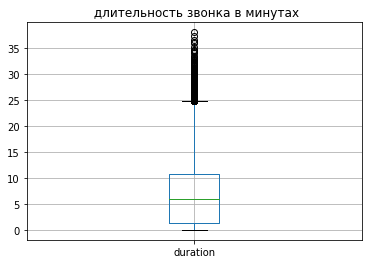

---------------------------------------
count    202607.000000
mean          6.755887
std           5.843365
min           0.000000
25%           1.300000
50%           6.000000
75%          10.700000
max          38.000000
Name: duration, dtype: float64
---------------------------------------
 Обратить внимание:
 call_date - datetime


In [ ]:
display(calls.head(5))
print('---------------------------------------')
print(calls.info())
print('---------------------------------------')
print('пропуски:\n\n', calls.isna().sum())
print('---------------------------------------')
print('дубликаты:\n\n', calls.duplicated().sum())
print('---------------------------------------')
print('имена столбцов:\n\n', calls.columns)
print('---------------------------------------')
calls.boxplot('duration')
plt.title(' длительность звонка в минутах')
plt.show()
print('---------------------------------------')
print(calls['duration'].describe())
print('---------------------------------------')
print('\033[31m Обратить внимание:')
print('\033[43m call_date - datetime')

### internet

**Таблица internet (информация об интернет-сессиях):**
- id — уникальный номер сессии
- mb_used — объём потраченного за сессию интернет-трафика (в мегабайтах)
- session_date — дата интернет-сессии
- user_id — идентификатор пользователя

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000


---------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    149396 non-null  int64  
 1   id            149396 non-null  object 
 2   mb_used       149396 non-null  float64
 3   session_date  149396 non-null  object 
 4   user_id       149396 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB
None
---------------------------------------
пропуски:

 Unnamed: 0      0
id              0
mb_used         0
session_date    0
user_id         0
dtype: int64
---------------------------------------
дубликаты:

 0
---------------------------------------
имена столбцов:

 Index(['Unnamed: 0', 'id', 'mb_used', 'session_date', 'user_id'], dtype='object')
---------------------------------------


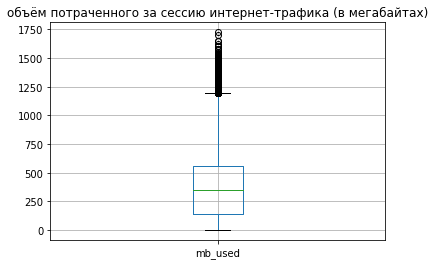

---------------------------------------
count    149396.000000
mean        370.192426
std         278.300951
min           0.000000
25%         138.187500
50%         348.015000
75%         559.552500
max        1724.830000
Name: mb_used, dtype: float64
---------------------------------------
 Обратить внимание:
 Unnamed: 0 - если этот столбец нужен, то исправить имя 
 mb_used - округлить до гб (в большую сторону) и можно в int; есть выбросы 
 session_date - datetime 
 user_id - скорее всего тип данных нужен object


In [ ]:
display(internet.head(5))
print('---------------------------------------')
print(internet.info())
print('---------------------------------------')
print('пропуски:\n\n', internet.isna().sum())
print('---------------------------------------')
print('дубликаты:\n\n', internet.duplicated().sum())
print('---------------------------------------')
print('имена столбцов:\n\n', internet.columns)
print('---------------------------------------')
internet.boxplot('mb_used')
plt.title('объём потраченного за сессию интернет-трафика (в мегабайтах)')
plt.show()
print('---------------------------------------')
print(internet['mb_used'].describe())
print('---------------------------------------')
print('\033[31m Обратить внимание:')
print('\033[43m Unnamed: 0 - если этот столбец нужен, то исправить имя \n mb_used - округлить до гб (в большую сторону) и можно в int; есть выбросы \n session_date - datetime \n user_id - скорее всего тип данных нужен object')

### messages

**Таблица messages (информация о сообщениях):**
- id — уникальный номер сообщения
- message_date — дата сообщения
- user_id — идентификатор пользователя, отправившего сообщение

In [ ]:
display(messages.head(5))
print('---------------------------------------')
print(messages.info())
print('---------------------------------------')
print('пропуски:\n\n', messages.isna().sum())
print('---------------------------------------')
print('дубликаты:\n\n', messages.duplicated().sum())
print('---------------------------------------')
print('имена столбцов:\n\n', messages.columns)
print('---------------------------------------')
print('\033[31m Обратить внимание:')
print('\033[43m message_date - datetime \n user_id - скорее всего тип данных нужен object')

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


---------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.8+ MB
None
---------------------------------------
пропуски:

 id              0
message_date    0
user_id         0
dtype: int64
---------------------------------------
дубликаты:

 0
---------------------------------------
имена столбцов:

 Index(['id', 'message_date', 'user_id'], dtype='object')
---------------------------------------
 Обратить внимание:
 message_date - datetime 
 user_id - скорее всего тип данных нужен object


### tariffs

**Таблица tariffs (информация о тарифах):**
- tariff_name — название тарифа
- rub_monthly_fee — ежемесячная абонентская плата в рублях
- minutes_included — количество минут разговора в месяц, включённых в абонентскую плату
- messages_included — количество сообщений в месяц, включённых в абонентскую плату
- mb_per_month_included — объём интернет-трафика, включённого в абонентскую плату (в мегабайтах)
- rub_per_minute — стоимость минуты разговора сверх тарифного пакета (например, если в тарифе 100 минут разговора в месяц, то со 101 минуты будет взиматься плата)
- rub_per_message — стоимость отправки сообщения сверх тарифного пакета
- rub_per_gb — стоимость дополнительного гигабайта интернет-трафика сверх тарифного пакета (1 гигабайт = 1024 мегабайта)

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


---------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   messages_included      2 non-null      int64 
 1   mb_per_month_included  2 non-null      int64 
 2   minutes_included       2 non-null      int64 
 3   rub_monthly_fee        2 non-null      int64 
 4   rub_per_gb             2 non-null      int64 
 5   rub_per_message        2 non-null      int64 
 6   rub_per_minute         2 non-null      int64 
 7   tariff_name            2 non-null      object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes
None
---------------------------------------
пропуски:

 messages_included        0
mb_per_month_included    0
minutes_included         0
rub_monthly_fee          0
rub_per_gb               0
rub_per_message          0
rub_per_minute           0
tariff_name              0
dtype: int64
---------

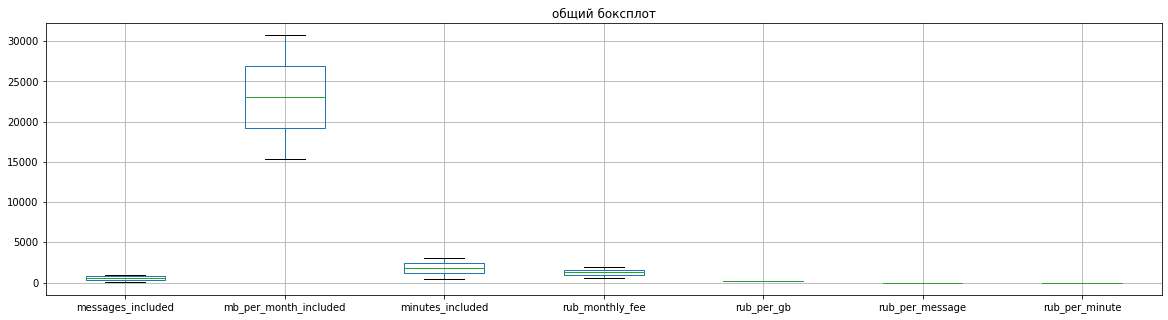

---------------------------------------
 Обратить внимание:
 mb_per_month_included - в гб


In [ ]:
display(tariffs.head(5))
print('---------------------------------------')
print(tariffs.info())
print('---------------------------------------')
print('пропуски:\n\n', tariffs.isna().sum())
print('---------------------------------------')
print('дубликаты:\n\n', tariffs.duplicated().sum())
print('---------------------------------------')
print('имена столбцов:\n\n', tariffs.columns)
print('---------------------------------------')
print('уникальные значения:\n\n', tariffs['tariff_name'].unique())
print('---------------------------------------')
tariffs.boxplot(figsize=(20,5))
plt.title('общий боксплот')
plt.show()
print('---------------------------------------')
print('\033[31m Обратить внимание:')
print('\033[43m mb_per_month_included - в гб')

### users

**Таблица users (информация о пользователях):**
- user_id — уникальный идентификатор пользователя
- first_name — имя пользователя
- last_name — фамилия пользователя
- age — возраст пользователя (годы)
- reg_date — дата подключения тарифа (день, месяц, год)
- churn_date — дата прекращения пользования тарифом (если значение пропущено, то тариф ещё действовал на момент выгрузки данных)
- city — город проживания пользователя
- tariff — название тарифного плана

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


---------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   tariff      500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB
None
---------------------------------------
пропуски:

 user_id         0
age             0
churn_date    462
city            0
first_name      0
last_name       0
reg_date        0
tariff          0
dtype: int64
---------------------------------------
дубликаты:

 0
---------------------------------------
имена столбцов:

 Index(['user_id', 'age', 'churn_date', 'city', 'first_name', 'last_name',
    

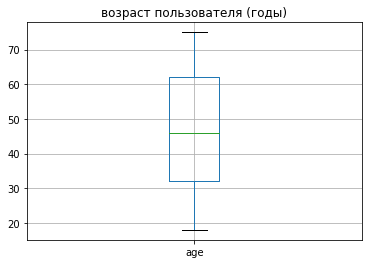

---------------------------------------
count    500.00000
mean      46.58800
std       16.66763
min       18.00000
25%       32.00000
50%       46.00000
75%       62.00000
max       75.00000
Name: age, dtype: float64
---------------------------------------
 Обратить внимание:
 user_id - скорее всего тип данных нужен object 
 churn_date & reg_date - datetime 
 first_name & last_name - в один столбец


In [ ]:
display(users.head(5))
print('---------------------------------------')
print(users.info())
print('---------------------------------------')
print('пропуски:\n\n', users.isna().sum())
print('---------------------------------------')
print('дубликаты:\n\n', users.duplicated().sum())
print('---------------------------------------')
print('имена столбцов:\n\n', users.columns)
print('---------------------------------------')
print('уникальные значения tariff:\n\n', users['tariff'].unique())
print()
print('уникальные значения city:\n\n', users['city'].unique())
print('---------------------------------------')
users.boxplot('age')
plt.title('возраст пользователя (годы)')
plt.show()
print('---------------------------------------')
print(users['age'].describe())
print('---------------------------------------')
print('\033[31m Обратить внимание:')
print('\033[43m user_id - скорее всего тип данных нужен object \n churn_date & reg_date - datetime \n first_name & last_name - в один столбец')

### Вывод:

Данные достаточно чистые.

Выбросов не заметил

В основном нужно поправить тип данных и округлить значения

# Шаг 2. Подготовьте данные

- Приведите данные к нужным типам;
- Найдите и исправьте ошибки в данных, если они есть.

Поясните, какие ошибки вы нашли и как их исправили. В данных вы найдёте звонки с нулевой продолжительностью. Это не ошибка: нулями обозначены пропущенные звонки, поэтому их не нужно удалять.

Посчитайте для каждого пользователя:

- количество сделанных звонков и израсходованных минут разговора по месяцам;
- количество отправленных сообщений по месяцам;
- объем израсходованного интернет-трафика по месяцам;
- помесячную выручку с каждого пользователя (вычтите бесплатный лимит из суммарного количества звонков, сообщений и интернет-трафика; остаток умножьте на значение из тарифного плана; прибавьте абонентскую плату, соответствующую тарифному плану).

### Приведите данные к нужным типам

In [ ]:
# datetime

calls['call_date'] = pd.to_datetime(calls['call_date'], format='%Y-%m-%d')

internet['session_date'] = pd.to_datetime(internet['session_date'], format='%Y-%m-%d')

messages['message_date'] = pd.to_datetime(messages['message_date'], format='%Y-%m-%d')

users['reg_date'] = pd.to_datetime(users['reg_date'], format='%Y-%m-%d')

users['churn_date'] = pd.to_datetime(users['churn_date'], format='%Y-%m-%d')

### Округление минут и мб

In [ ]:
# округлить calls['duration'] до минут в большую сторону

calls['duration_min'] = np.ceil(calls['duration']).astype('int')

calls.head()

,id,call_date,duration,user_id,duration_min
0,1000_0,2018-07-25,0.00,1000,0
1,1000_1,2018-08-17,0.00,1000,0
2,1000_2,2018-06-11,2.85,1000,3
3,1000_3,2018-09-21,13.80,1000,14
4,1000_4,2018-12-15,5.18,1000,6


In [ ]:
# округлить internet['mb_used'] до гб в большую сторону

internet['gb_used'] = np.ceil(internet['mb_used'] / 1024).astype('int')

internet.head(5)
internet.isna().sum()

Unnamed: 0      0
id              0
mb_used         0
session_date    0
user_id         0
gb_used         0
dtype: int64

### Найдите и исправьте ошибки в данных, если они есть.

Поясните, какие ошибки вы нашли и как их исправили. В данных вы найдёте звонки с нулевой продолжительностью. Это не ошибка: нулями обозначены пропущенные звонки, поэтому их не нужно удалять.

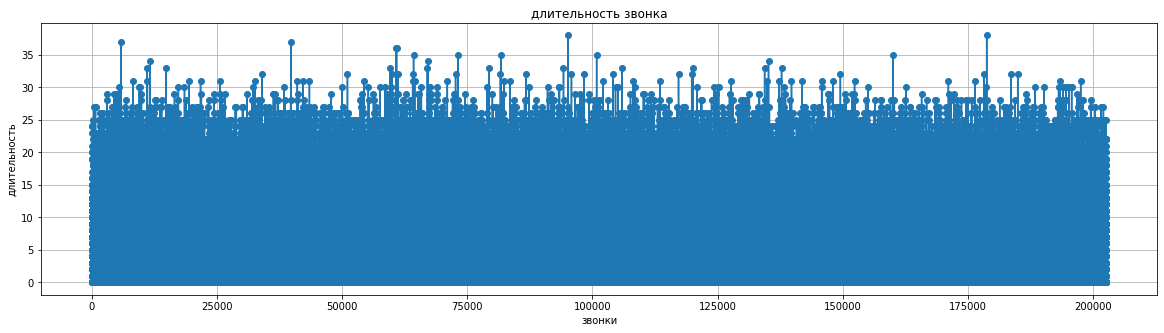


Есть выбросы, но это я небуду считать их за ошибки


In [ ]:
calls['duration_min'].plot(
    grid=True,
    style='o-',
    figsize=(20, 5)
    )
plt.title('длительность звонка')
plt.xlabel('звонки')
plt.ylabel('длительность')
plt.show()
print()
print('Есть выбросы, но я не буду считать их за ошибки')

4.06.2022 на данном этапе я не вижу ошибок

### Определение гендера по имени

есть несколько сексистких предрассудков котырые нужно проверить

In [ ]:
def trans(t):
  name = t['first_name']
  return translit_ru(name, reversed=True)
users['trans'] = users.apply(trans, axis=1)

users['gender'] = users['trans'].map(gd.get_gender)
users = users.drop(
    columns=['trans']
    )
display(users.head(10))

# что-то нужно сделать с неопределившимимся

test = users.query('gender == "unknown"')

print(test['first_name'].unique())

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,gender
0,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,male
1,1001,41,NaT,Москва,Иван,Ежов,2018-11-01,smart,male
2,1002,59,NaT,Стерлитамак,Евгений,Абрамович,2018-06-17,smart,male
3,1003,23,NaT,Москва,Белла,Белякова,2018-08-17,ultra,female
4,1004,68,NaT,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra,unknown
5,1005,67,NaT,Набережные Челны,Афанасий,Горлов,2018-01-25,smart,unknown
6,1006,21,NaT,Ульяновск,Леонид,Ермолаев,2018-02-26,smart,male
7,1007,65,NaT,Москва,Юна,Березина,2018-04-19,smart,female
8,1008,63,NaT,Челябинск,Рустэм,Пономарёв,2018-12-19,smart,male
9,1009,24,NaT,Пермь,Василиса,Блинова,2018-03-22,smart,female


['Татьяна' 'Афанасий' 'Марица' 'Матвей' 'Игнатий' 'Лаврентий' 'Изольда'
 'Агнесса' 'Иннокентий' 'Джемма' 'Милица' 'Габриель' 'Ренальд' 'Лукий'
 'Таира' 'Гордей' 'Эльза' 'Гектор' 'Рафаэль' 'Еремей' 'Софья' 'Авксентий'
 'Ириней' 'Гелена' 'Аюна' 'Эльвира' 'Габриэль' 'Арнольд' 'Альберта'
 'Альбин' 'Марьяна' 'Клариса' 'Майя' 'Игорь' 'Эльга' 'Геральд' 'Агафья'
 'Наталья' 'Рауль' 'Демьян' 'Евфросинья' 'Гайдар' 'Артемий' 'Ермолай'
 'Кузьма' 'Касьян' 'Мальвина' 'Мстислав' 'Аксён' 'Альфред' 'Тихон' 'Илья'
 'Рудольф' 'Эсмеральда' 'Дайна' 'Джозефина' 'Фаддей' 'Герасим' 'Геодар'
 'Эльмира' 'Джулия']


In [ ]:
names = pd.DataFrame({
    'woman': ['Татьяна', 'Марица', 'Изольда', 'Агнесса',
              'Джемма', 'Милица', 'Таира',
              'Эльза', 'Софья', 'Гелена', 'Аюна', 'Эльвира',
              'Габриэль', 'Альберта', 'Альбин', 'Марьяна',
              'Клариса', 'Майя', 'Эльга', 'Агафья', 'Наталья',
              'Евфросинья', 'Мальвина', 'Эсмеральда', 'Дайна',
              'Джозефина', 'Эльмира', 'Джулия', 'x', 'x',
              'x', 'x', 'x', 'x', 'x'],
    'man': ['Афанасий', 'Матвей', 'Игнатий', 'Лаврентий',
            'Иннокентий', 'Ренальд', 'Лукий',
            'Гордей', 'Гектор', 'Рафаэль', 'Еремей', 'Авксентий',
            'Ириней', 'Габриэль', 'Арнольд', 'Альбин',
            'Игорь', 'Геральд', 'Рауль', 'Демьян', 'Гайдар',
            'Артемий', 'Ермолай', 'Кузьма', 'Касьян', 'Мстислав',
            'Аксён', 'Альфред', 'Тихон', 'Илья', 'Рудольф', 'Фаддей',
            'Герасим', 'Геодар', 'Габриель']
})

for i in users['first_name']:
  for x in names['woman']:
    if i == x:
      users.loc[users["first_name"] == x, "gender"] = 'female'

for i in users['first_name']:
  for x in names['man']:
    if i == x:
      users.loc[users["first_name"] == x, "gender"] = 'male'

In [ ]:
print(users['gender'].unique())
print()
display(users.query('gender == "mostly_female"'))
display(users.query('gender == "mostly_male"'))
users = users.replace('mostly_male', 'female')
users = users.replace('mostly_female', 'male')
print()
print(users['gender'].unique())

['male' 'female' 'mostly_female' 'mostly_male']



,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,gender
68,1068,34,NaT,Москва,Ким,Демьянов,2018-07-16,smart,mostly_female
137,1137,64,NaT,Кемерово,Ким,Артёшин,2018-12-02,smart,mostly_female


,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,gender
301,1301,26,NaT,Махачкала,Наида,Авраменко,2018-09-27,smart,mostly_male
472,1472,53,NaT,Ярославль,Наида,Боброва,2018-01-18,smart,mostly_male



['male' 'female']


### Посчитайте для каждого пользователя:


#### - количество сделанных звонков и израсходованных минут разговора по месяцам;

In [ ]:
# добавлю имя месяца

calls['month_name'] = calls['call_date'].dt.month_name()
calls['month'] = pd.DatetimeIndex(calls['call_date']).month

# пивот

calls_pivot = calls.pivot_table(
    index=['month', 'month_name', 'user_id'],
    values='duration',
    aggfunc=['count', 'sum']
    )

calls_pivot.columns = ['quantity_calls', 'total_duration'] 

# quantity_calls - количество звонков
# total_duration - общее время всех звонков

calls_pivot = calls_pivot.reset_index() ###

calls_pivot.head(10)

,month,month_name,user_id,quantity_calls,total_duration
0,1,January,1005,15,90.93
1,1,January,1032,61,359.16
2,1,January,1045,1,8.33
3,1,January,1055,64,527.95
4,1,January,1071,24,183.96
5,1,January,1113,18,104.60
6,1,January,1120,5,52.72
7,1,January,1126,35,258.44
8,1,January,1134,42,313.81
9,1,January,1135,9,85.77


#### - количество отправленных сообщений по месяцам;

In [ ]:
# добавлю имя месяца

messages['month_name'] = messages['message_date'].dt.month_name()
messages['month'] = pd.DatetimeIndex(messages['message_date']).month

# пивот

messages_pivot = messages.pivot_table(
    index=['month', 'month_name', 'user_id'],
    values='id',
    aggfunc=['count']
    )

messages_pivot.columns = ['quantity_messages'] 

# quantity_messages - количество сообщений


messages_pivot = messages_pivot.reset_index() ###

messages_pivot.head(5)

,month,month_name,user_id,quantity_messages
0,1,January,1005,7
1,1,January,1032,38
2,1,January,1045,5
3,1,January,1055,30
4,1,January,1071,16


#### - объем израсходованного интернет-трафика по месяцам;

In [ ]:
# добавлю имя месяца

internet['month_name'] = internet['session_date'].dt.month_name()
internet['month'] = pd.DatetimeIndex(internet['session_date']).month

# пивот

internet_pivot = internet.pivot_table(
    index=['month', 'month_name', 'user_id'],
    values='mb_used',
    aggfunc=['sum']
    )

internet_pivot.columns = ['quantity_traffic_mb'] 

# quantity_messages - количество трафика в мб

internet_pivot = internet_pivot.reset_index() ###

internet_pivot.head(5)
internet_pivot.isna().sum()

month                  0
month_name             0
user_id                0
quantity_traffic_mb    0
dtype: int64

### помесячную выручку с каждого пользователя (вычтите бесплатный лимит из суммарного количества звонков, сообщений и интернет-трафика; остаток умножьте на значение из тарифного плана; прибавьте абонентскую плату, соответствующую тарифному плану).

#### создание общего df

In [ ]:
# # соберу все пивотики вместе
# print()
# print('c помощью join')
# print()
# df_join = calls_pivot.join([messages_pivot, internet_pivot])#.reset_index()

# display(df_join.head(5))
# print(df_join.info())
# print(df_join.isna().sum())

In [ ]:
print('c помощью merge')
print()
df_merge_a = pd.merge(calls_pivot, messages_pivot, how='outer', on=['user_id', 'month', 'month_name']) # звонки + сообщения

df_merge_ab = pd.merge(internet_pivot, df_merge_a, how='outer', on=['user_id', 'month', 'month_name']) # .reset_index() # звонки + сообщения + интернет

df_merge = pd.merge(users, df_merge_ab, how='outer', on=['user_id'])     # звонки + сообщения + интернет + юзеры

#display(df_merge)

df_merge.isna().sum()

c помощью merge



user_id                   0
age                       0
churn_date             3027
city                      0
first_name                0
last_name                 0
reg_date                  0
tariff                    0
gender                    0
month                     2
month_name                2
quantity_traffic_mb      13
quantity_calls           42
total_duration           42
quantity_messages       499
dtype: int64

In [ ]:
# # версия с df_join (пропадают 8 человек)

# df = pd.merge(
#     left=users,
#     right=df_join,
#     on="user_id"
#     )

# # создам столбец имя + фамилия

# df['full_name']=df['first_name']+' '+df['last_name']

# df = df.drop(columns=['first_name', 'last_name'])

In [ ]:
# версия с df_merge

df = df_merge

df.head(10)

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,gender,month,month_name,quantity_traffic_mb,quantity_calls,total_duration,quantity_messages
0,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,male,5.0,May,2253.49,22.0,150.06,22.0
1,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,male,6.0,June,23233.77,43.0,158.90,60.0
2,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,male,7.0,July,14003.64,47.0,318.80,75.0
3,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,male,8.0,August,14055.93,52.0,389.87,81.0
4,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,male,9.0,September,14568.91,58.0,440.14,57.0
5,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,male,10.0,October,14702.49,57.0,328.45,73.0
6,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,male,11.0,November,14756.47,43.0,319.04,58.0
7,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,male,12.0,December,9817.61,46.0,312.98,70.0
8,1001,41,NaT,Москва,Иван,Ежов,2018-11-01,smart,male,11.0,November,18429.34,59.0,408.12,NaN
9,1001,41,NaT,Москва,Иван,Ежов,2018-11-01,smart,male,12.0,December,14036.66,63.0,391.34,NaN


#### приведу df в порядок

In [ ]:
df['quantity_calls'] = df['quantity_calls'].fillna(0).astype('int') # количество звонков в инт

df['quantity_messages'] = df['quantity_messages'].fillna(0).astype('int') # количество сообщений в инт

df['total_duration'] = np.ceil(df['total_duration'].fillna(0)).astype('int') # округлю общее время разговоров большую сторону

df['quantity_traffic_mb'] = df['quantity_traffic_mb'].fillna(0)
df['quantity_traffic_gb'] = np.ceil(df['quantity_traffic_mb'] / 1024).astype('int') # переведу трафик в гб и округлю

df['full_name']=df['first_name']+' '+df['last_name'] # создам столбец имя + фамилия

df = df.rename(columns={'tariff':'tariff_name'}) # для объединения с tariff

In [ ]:
df = df.drop(columns=['quantity_traffic_mb', 'first_name', 'last_name']) # лишнее

In [ ]:
# я очень зол на этих людей. три дня искал проблему. 2 раза проект переписывал
# я их дропну или гендер им удалю

df.query('month_name != ["May","June", "July", "August", "September", "October", "November", "December", "April", "March", "February", "January"]')

,user_id,age,churn_date,city,reg_date,tariff_name,gender,month,month_name,quantity_calls,total_duration,quantity_messages,quantity_traffic_gb,full_name
827,1128,51,2018-12-23,Волжский,2018-12-15,ultra,female,NaN,NaN,0,0,0,0,Ксения Агаева
2335,1371,50,2018-12-30,Омск,2018-12-25,smart,male,NaN,NaN,0,0,0,0,Ириней Трофимов


In [ ]:
df = df.drop(labels = [827,2335],axis = 0)
df.query('month_name != ["May","June", "July", "August", "September", "October", "November", "December", "April", "March", "February", "January"]')

,user_id,age,churn_date,city,reg_date,tariff_name,gender,month,month_name,quantity_calls,total_duration,quantity_messages,quantity_traffic_gb,full_name


In [ ]:
columns_df = list(df.columns.values)
print(columns_df)

df = df[['user_id',
         'full_name',
         'age',
         'gender',
         'city',
         'reg_date',
         'churn_date',
         'tariff_name',
         'month',
         'month_name',
         'quantity_calls',
         'total_duration',
         'quantity_messages',
         'quantity_traffic_gb'
         ]]

display(df.head(5))

df.isna().sum()

['user_id', 'age', 'churn_date', 'city', 'reg_date', 'tariff_name', 'gender', 'month', 'month_name', 'quantity_calls', 'total_duration', 'quantity_messages', 'quantity_traffic_gb', 'full_name']


,user_id,full_name,age,gender,city,reg_date,churn_date,tariff_name,month,month_name,quantity_calls,total_duration,quantity_messages,quantity_traffic_gb
0,1000,Рафаил Верещагин,52,male,Краснодар,2018-05-25,NaT,ultra,5.0,May,22,151,22,3
1,1000,Рафаил Верещагин,52,male,Краснодар,2018-05-25,NaT,ultra,6.0,June,43,159,60,23
2,1000,Рафаил Верещагин,52,male,Краснодар,2018-05-25,NaT,ultra,7.0,July,47,319,75,14
3,1000,Рафаил Верещагин,52,male,Краснодар,2018-05-25,NaT,ultra,8.0,August,52,390,81,14
4,1000,Рафаил Верещагин,52,male,Краснодар,2018-05-25,NaT,ultra,9.0,September,58,441,57,15


user_id                   0
full_name                 0
age                       0
gender                    0
city                      0
reg_date                  0
churn_date             3027
tariff_name               0
month                     0
month_name                0
quantity_calls            0
total_duration            0
quantity_messages         0
quantity_traffic_gb       0
dtype: int64

In [ ]:
tariffs['gb_per_month_included'] = (tariffs['mb_per_month_included'] / 1024).astype('int')

#### присоединю тарифы

In [ ]:
df = pd.merge(
    left=df,
    right=tariffs,
    on="tariff_name",
    how='outer' # добавил how='outer'
    )

In [ ]:
df

,user_id,full_name,age,gender,city,reg_date,churn_date,tariff_name,month,month_name,...,quantity_messages,quantity_traffic_gb,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,gb_per_month_included
0,1000,Рафаил Верещагин,52,male,Краснодар,2018-05-25,NaT,ultra,5.0,May,...,22,3,1000,30720,3000,1950,150,1,1,30
1,1000,Рафаил Верещагин,52,male,Краснодар,2018-05-25,NaT,ultra,6.0,June,...,60,23,1000,30720,3000,1950,150,1,1,30
2,1000,Рафаил Верещагин,52,male,Краснодар,2018-05-25,NaT,ultra,7.0,July,...,75,14,1000,30720,3000,1950,150,1,1,30
3,1000,Рафаил Верещагин,52,male,Краснодар,2018-05-25,NaT,ultra,8.0,August,...,81,14,1000,30720,3000,1950,150,1,1,30
4,1000,Рафаил Верещагин,52,male,Краснодар,2018-05-25,NaT,ultra,9.0,September,...,57,15,1000,30720,3000,1950,150,1,1,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3209,1498,Всеволод Акимчин,68,male,Владикавказ,2018-07-19,2018-10-25,smart,10.0,October,...,42,21,50,15360,500,550,200,3,3,15
3210,1499,Гектор Корнилов,35,male,Пермь,2018-09-27,NaT,smart,9.0,September,...,11,2,50,15360,500,550,200,3,3,15
3211,1499,Гектор Корнилов,35,male,Пермь,2018-09-27,NaT,smart,10.0,October,...,48,18,50,15360,500,550,200,3,3,15
3212,1499,Гектор Корнилов,35,male,Пермь,2018-09-27,NaT,smart,11.0,November,...,59,18,50,15360,500,550,200,3,3,15


### Расчет для каждого абонента

я знаю, что переменные нужн прописывать сразу после функции, но из-за того, что их много, код тяжело читать. 

- Красивое лучше уродливого
- Развернутое лучше вложенного
- Разреженное лучше плотного
- Читаемость имеет значение

In [ ]:
# def need_to_pay(row):
#   #минуты
#   minute_counter = 0                          #счетчик минут
#   total_duration = row['total_duration']      #использованные минуты
#   minutes_included = row['minutes_included']  #количество минут в тарифе
#   rub_per_minute = row['rub_per_minute']      #стоимость минуты сверх тарифа
#   #тариф
#   tariff_counter = 0                          #стоимость тарифа
#   tariff_name = row['tariff_name']            #имя тарифа
#   #интернет
#   internet_counter = 0                                  #счетчик трафика
#   quantity_traffic_gb = row['quantity_traffic_gb']      #израсходованный трафик
#   gb_per_month_included = row['gb_per_month_included']  #трафик в тарифе
#   rub_per_gb = row['rub_per_gb']                        #стоимсоть одного гига сверх тарифа
#   #сообщения
#   message_counter = 0                           #счетчик сообщений
#   quantity_messages = row['quantity_messages']  #количество отправленных сообщений
#   messages_included = row['messages_included']  #количество сообщений в тарифе
#   rub_per_message = row['rub_per_message']      #стоимость сообщений сверх тарифа
#   #сообщения
#   if quantity_messages > messages_included:
#     message_counter += (quantity_messages - messages_included) * rub_per_message

#   #переплата за интернет
#   if quantity_traffic_gb > gb_per_month_included:
#     internet_counter +=  (quantity_traffic_gb - gb_per_month_included) * rub_per_gb

#   #оплата тарифа
#   if tariff_name == 'ultra':
#     tariff_counter = 1950
#   if tariff_name == 'smart':
#     tariff_counter = 550

#   #переплата за минуты
#   if total_duration > minutes_included:
#     minute_counter += (total_duration - minutes_included) * rub_per_minute
#   # if total_duration <= minutes_included:
#   #   minute_counter = 0

#   return minute_counter + tariff_counter + internet_counter + message_counter

# df['need_to_pay'] = df.apply(need_to_pay, axis=1)

In [ ]:
# для удобства чтения

def need_to_pay(row):
  
  #тариф
  tariff_counter = 0                                    #стоимость тарифа
  tariff_name = row['tariff_name']                      #имя тарифа

  #оплата тарифа
  if tariff_name == 'ultra':
    tariff_counter = 1950
  if tariff_name == 'smart':
    tariff_counter = 550

  #минуты
  minute_counter = 0                                    #счетчик минут
  total_duration = row['total_duration']                #использованные минуты
  minutes_included = row['minutes_included']            #количество минут в тарифе
  rub_per_minute = row['rub_per_minute']                #стоимость минуты сверх тарифа

  #переплптп за минуты
  if total_duration > minutes_included:
    minute_counter += (total_duration - minutes_included) * rub_per_minute

  
  #интернет
  internet_counter = 0                                  #счетчик трафика
  quantity_traffic_gb = row['quantity_traffic_gb']      #израсходованный трафик
  gb_per_month_included = row['gb_per_month_included']  #трафик в тарифе
  rub_per_gb = row['rub_per_gb']                        #стоимсоть одного гига сверх тарифа

  #переплата за интернет
  if quantity_traffic_gb > gb_per_month_included:
    internet_counter +=  (quantity_traffic_gb - gb_per_month_included) * rub_per_gb

  #сообщения
  message_counter = 0                                   #счетчик сообщений
  quantity_messages = row['quantity_messages']          #количество отправленных сообщений
  messages_included = row['messages_included']          #количество сообщений в тарифе
  rub_per_message = row['rub_per_message']              #стоимость сообщений сверх тарифа

  #сообщения
  if quantity_messages > messages_included:
    message_counter += (quantity_messages - messages_included) * rub_per_message

  return minute_counter + tariff_counter + internet_counter + message_counter

df['need_to_pay'] = df.apply(need_to_pay, axis=1)

In [ ]:
df.head(5)

,user_id,full_name,age,gender,city,reg_date,churn_date,tariff_name,month,month_name,...,quantity_traffic_gb,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,gb_per_month_included,need_to_pay
0,1000,Рафаил Верещагин,52,male,Краснодар,2018-05-25,NaT,ultra,5.0,May,...,3,1000,30720,3000,1950,150,1,1,30,1950
1,1000,Рафаил Верещагин,52,male,Краснодар,2018-05-25,NaT,ultra,6.0,June,...,23,1000,30720,3000,1950,150,1,1,30,1950
2,1000,Рафаил Верещагин,52,male,Краснодар,2018-05-25,NaT,ultra,7.0,July,...,14,1000,30720,3000,1950,150,1,1,30,1950
3,1000,Рафаил Верещагин,52,male,Краснодар,2018-05-25,NaT,ultra,8.0,August,...,14,1000,30720,3000,1950,150,1,1,30,1950
4,1000,Рафаил Верещагин,52,male,Краснодар,2018-05-25,NaT,ultra,9.0,September,...,15,1000,30720,3000,1950,150,1,1,30,1950


In [ ]:
#переплата

df['overpayment'] = df['need_to_pay'] - df['rub_monthly_fee']

#сделаю красиво. нравится.)

df = df.drop(
    columns=[
             'messages_included',
             'mb_per_month_included',
             'minutes_included',
             'rub_monthly_fee',
             'rub_per_gb',
             'rub_per_message',
             'rub_per_minute',
             'gb_per_month_included'
             ]
             ) 


df = df.pivot_table(
    index=['user_id', 'full_name', 'age', 'gender', 'city', 'tariff_name', 'month'] # добавил city
    )
df.head(20)

need_to_pay  \
user_id full_name         age gender city        tariff_name month                
1000    Рафаил Верещагин  52  male   Краснодар   ultra       5.0           1950   
                                                             6.0           1950   
                                                             7.0           1950   
                                                             8.0           1950   
                                                             9.0           1950   
                                                             10.0          1950   
                                                             11.0          1950   
                                                             12.0          1950   
1001    Иван Ежов         41  male   Москва      smart       11.0          1150   
                                                             12.0           550   
1002    Евгений Абрамович 59  male   Стерлитамак smart       6.0            550   
                                                             7.0           1150   
                                                             8.0           1550   
                                                             9.0            950   
                                                             10.0           550   
                                                             11.0          1350   
                                                             12.0          1150   
1003    Белла Белякова    23  female Москва      ultra       8.0           1950   
                                                             9.0           1950   
                                                             10.0          1950   

                                                                    overpayment  \
user_id full_name         age gender city        tariff_name month                
1000    Рафаил Верещагин  52  male   Краснодар   ultra       5.0              0   
                                                             6.0              0   
                                                             7.0              0   
                                                             8.0              0   
                                                             9.0              0   
                                                             10.0             0   
                                                             11.0             0   
                                                             12.0             0   
1001    Иван Ежов         41  male   Москва      smart       11.0           600   
                                                             12.0             0   
1002    Евгений Абрамович 59  male   Стерлитамак smart       6.0              0   
                                                             7.0            600   
                                                             8.0           1000   
                                                             9.0            400   
                                                             10.0             0   
                                                             11.0           800   
                                                             12.0           600   
1003    Белла Белякова    23  female Москва      ultra       8.0              0   
                                                             9.0              0   
                                                             10.0             0   

                                                                    quantity_calls  \
user_id full_name         age gender city        tariff_name month                   
1000    Рафаил Верещагин  52  male   Краснодар   ultra       5.0                22   
                                                             6.0                43   
                                                             7.0      

In [ ]:
df_test = df

df_test = df_test.reset_index()

df_test.head(10)

df_test.isna().sum() # не вижу nan

user_id                0
full_name              0
age                    0
gender                 0
city                   0
tariff_name            0
month                  0
need_to_pay            0
overpayment            0
quantity_calls         0
quantity_messages      0
quantity_traffic_gb    0
total_duration         0
dtype: int64

In [ ]:
df.head(10)
df.isna().sum()

need_to_pay            0
overpayment            0
quantity_calls         0
quantity_messages      0
quantity_traffic_gb    0
total_duration         0
dtype: int64

### Вывод

после того, как мне взбрела в голову идея, что нужно понять гендер пользователей и я смог!)), писать что-то еще совсем не хочется.
 
но надо

Я попробовал разные способы объединения таблиц и написал большую функцию.




<div class="alert-warning"> 
<b>Комментарий ревьюера 💡</b> 
    
Стоит доработать этот вывод, такое СЕО компании не отнесешь :)

<div class="alert alert-info">
<b>Комментарий:</b>
<br>Данные пришли в хорошем состоянии, они подходят для проведения аналитического анализа. 
Дополнительно был определен гендер каждого абонента для проверки гипотез
</div>

# Шаг 3. Проанализируйте данные

Опишите поведение клиентов оператора, исходя из выборки. 

Сколько минут разговора, сколько сообщений и какой объём интернет-трафика требуется пользователям каждого тарифа в месяц?

Посчитайте среднее количество, дисперсию и стандартное отклонение. Постройте гистограммы.

Опишите распределения.

### Тариф UTRA

In [ ]:
df_ultra = df.query('tariff_name == "ultra"').pivot_table(
    index='month',
    values=['total_duration',
            'quantity_messages',
            'quantity_traffic_gb',
            'need_to_pay'],
    aggfunc=['mean',
             'var',
             'std']
    ).reset_index()

df_ultra = df_ultra.rename(
    columns={
    'mean': 'mean_',
    'var': 'var_',
    'std': 'std_',
    }
    )

# уберу мультииндекс
df_ultra.columns = df_ultra.columns.map(''.join)

display(df_ultra)
df_ultra.describe()

,month,mean_need_to_pay,mean_quantity_messages,mean_quantity_traffic_gb,mean_total_duration,var_need_to_pay,var_quantity_messages,var_quantity_traffic_gb,var_total_duration,std_need_to_pay,std_quantity_messages,std_quantity_traffic_gb,std_total_duration
0,1.0,1950.000000,33.777778,13.222222,405.333333,0.000000,940.694444,44.444444,64885.250000,0.000000,30.670742,6.666667,254.725833
1,2.0,1975.000000,21.958333,12.000000,281.125000,7173.913043,716.824275,109.130435,79012.635870,84.698955,26.773574,10.446551,281.091864
2,3.0,2014.864865,32.297297,17.648649,462.972973,43175.675676,1732.381381,114.345345,99636.749249,207.787573,41.621886,10.693238,315.652894
3,4.0,2001.818182,31.563636,16.963636,432.363636,38515.151515,1407.287542,89.443098,64052.198653,196.252775,37.513831,9.457436,253.085358
4,5.0,2059.701493,37.850746,19.373134,482.208955,162669.606513,1624.644052,95.631389,74763.834464,403.323204,40.306874,9.779130,273.429761
5,6.0,2039.285714,41.726190,18.940476,453.452381,99823.580034,1986.297619,82.394005,82065.816982,315.948698,44.567899,9.077114,286.471320
6,7.0,2118.131868,49.846154,20.505495,515.692308,198917.582418,2372.042735,96.430525,84188.593162,446.001774,48.703621,9.819905,290.152707
7,8.0,2083.177570,48.439252,19.598131,482.401869,159761.505907,2171.739199,105.148298,87227.525657,399.701771,46.601923,10.254184,295.343064
8,9.0,2024.347826,52.286957,19.243478,509.600000,60937.070938,2152.855530,86.255988,94090.821053,246.854352,46.398874,9.287410,306.742271
9,10.0,2065.853659,58.430894,20.065041,527.308943,149685.125950,2697.181661,91.258030,94892.772624,386.891620,51.934398,9.552907,308.046705


,month,mean_need_to_pay,mean_quantity_messages,mean_quantity_traffic_gb,mean_total_duration,var_need_to_pay,var_quantity_messages,var_quantity_traffic_gb,var_total_duration,std_need_to_pay,std_quantity_messages,std_quantity_traffic_gb,std_total_duration
count,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000
mean,6.500000,2046.932856,43.714983,18.258937,468.658062,110071.498817,1913.406279,92.626250,84609.064506,298.261112,43.054200,9.573330,290.106563
std,3.605551,56.889858,12.320470,2.921533,73.014016,78532.390865,647.555249,17.881264,12670.635037,151.759887,8.072997,1.032702,22.088588
min,1.000000,1950.000000,21.958333,12.000000,281.125000,0.000000,716.824275,44.444444,64052.198653,0.000000,26.773574,6.666667,253.085358
25%,3.750000,2011.603194,33.407658,17.477396,448.180195,42010.544636,1570.304925,88.646320,77950.435518,204.903874,39.608613,9.414930,279.176338
50%,6.500000,2049.493603,45.082721,19.308306,482.305412,124754.352992,2069.576575,94.714022,85178.156754,351.420159,45.483387,9.731999,291.848047
75%,9.250000,2085.424222,53.162979,19.870738,512.441734,163899.333434,2398.269174,103.714663,94291.308946,404.836343,48.969954,10.183959,307.068380
max,12.000000,2138.848921,60.611511,21.741007,560.079137,232610.259618,2697.181661,114.345345,104324.856011,482.296858,51.934398,10.693238,322.993585


тариф ULTRA

__________________________________________________________________________
       mean_quantity_messages  mean_quantity_traffic_gb  mean_total_duration
count               12.000000                 12.000000            12.000000
mean                43.714983                 18.258937           468.658062
std                 12.320470                  2.921533            73.014016
min                 21.958333                 12.000000           281.125000
25%                 33.407658                 17.477396           448.180195
50%                 45.082721                 19.308306           482.305412
75%                 53.162979                 19.870738           512.441734
max                 60.611511                 21.741007           560.079137

Среднее количество сообщений в месяц: 44

Среднее объем трафика в месяц: 18 Гб

Среднее количество минут разговора в месяц: 469 мин.
__________________________________________________________________________
       var

array([[<AxesSubplot:xlabel='mean_quantity_messages', ylabel='mean_quantity_messages'>,
        <AxesSubplot:xlabel='mean_quantity_traffic_gb', ylabel='mean_quantity_messages'>,
        <AxesSubplot:xlabel='mean_total_duration', ylabel='mean_quantity_messages'>],
       [<AxesSubplot:xlabel='mean_quantity_messages', ylabel='mean_quantity_traffic_gb'>,
        <AxesSubplot:xlabel='mean_quantity_traffic_gb', ylabel='mean_quantity_traffic_gb'>,
        <AxesSubplot:xlabel='mean_total_duration', ylabel='mean_quantity_traffic_gb'>],
       [<AxesSubplot:xlabel='mean_quantity_messages', ylabel='mean_total_duration'>,
        <AxesSubplot:xlabel='mean_quantity_traffic_gb', ylabel='mean_total_duration'>,
        <AxesSubplot:xlabel='mean_total_duration', ylabel='mean_total_duration'>]],
      dtype=object)

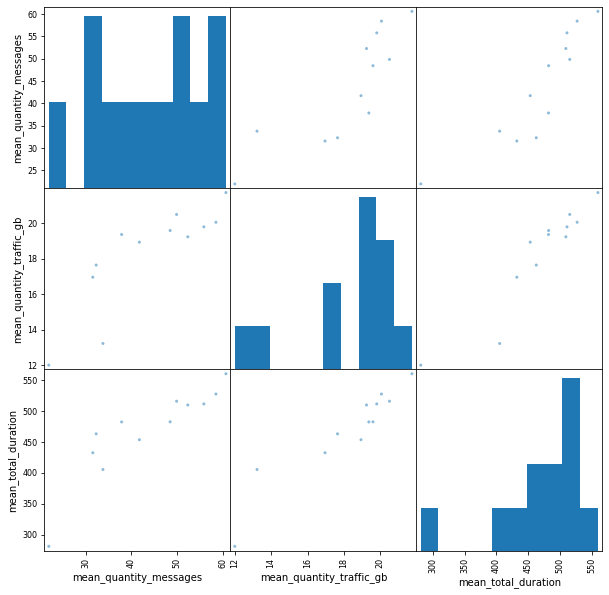

In [ ]:
print('тариф ULTRA')
print()
print('__________________________________________________________________________')
print(df_ultra.loc[:, ['mean_quantity_messages', 'mean_quantity_traffic_gb', 'mean_total_duration']].describe())
print()
print('Среднее количество сообщений в месяц: {:.0f}'.format(df_ultra['mean_quantity_messages'].mean()))
print()
print('Среднее объем трафика в месяц: {:.0f}'.format(df_ultra['mean_quantity_traffic_gb'].mean()), 'Гб')
print()
print('Среднее количество минут разговора в месяц: {:.0f}'.format(df_ultra['mean_total_duration'].mean()), 'мин.')
print('__________________________________________________________________________')
print(df_ultra.loc[:, ['var_quantity_messages', 'var_quantity_traffic_gb', 'var_total_duration']].describe())
print('__________________________________________________________________________')
print(df_ultra.loc[:, ['std_quantity_messages', 'std_quantity_traffic_gb', 'std_total_duration']].describe())
print()
pd.plotting.scatter_matrix(df_ultra[
                                    ['mean_quantity_messages',
                                     'mean_quantity_traffic_gb',
                                     'mean_total_duration']
                                    ],
                           figsize = (10,10)
                           )

### Тариф SMART

In [ ]:
df_smart = df.query('tariff_name == "smart"').pivot_table(
    index='month',
    values=['total_duration',
            'quantity_messages',
            'quantity_traffic_gb',
            'need_to_pay'],
    aggfunc=['sum', 'mean', 'std', 'var']
    ).reset_index()
    
df_smart = df_smart.rename(
    columns={
    'sum': 'sum_',
    'mean': 'mean_',
    'var': 'var_',
    'std': 'std_',
    }
    )

# уберу мультииндекс
df_smart.columns = df_smart.columns.map(''.join)

display(df_smart)
df_smart.describe()

,month,sum_need_to_pay,sum_quantity_messages,sum_quantity_traffic_gb,sum_total_duration,mean_need_to_pay,mean_quantity_messages,mean_quantity_traffic_gb,mean_total_duration,std_need_to_pay,std_quantity_messages,std_quantity_traffic_gb,std_total_duration,var_need_to_pay,var_quantity_messages,var_quantity_traffic_gb,var_total_duration
0,1.0,24456,620,297,6579,719.294118,18.235294,8.735294,193.500000,437.104213,16.197753,6.277950,146.327828,1.910601e+05,262.367201,39.412656,21411.833333
1,2.0,47053,1397,687,16438,811.258621,24.086207,11.844828,283.413793,525.639112,21.750809,6.095157,180.973783,2.762965e+05,473.097701,37.150938,32751.509982
2,3.0,87384,2453,1173,28362,1134.857143,31.857143,15.233766,368.337662,678.050819,26.804710,5.705252,181.538137,4.597529e+05,718.492481,32.549897,32956.095010
3,4.0,105253,3443,1526,38838,939.758929,30.741071,13.625000,346.767857,546.303949,24.538532,5.594600,176.135134,2.984480e+05,602.139559,31.299550,31023.585264
4,5.0,165339,4762,2243,51565,1172.617021,33.773050,15.907801,365.709220,712.596005,27.036845,5.862594,176.560210,5.077931e+05,730.990983,34.370010,31173.507700
5,6.0,192950,5478,2616,61283,1176.524390,33.402439,15.951220,373.676829,733.748929,28.404337,5.649046,165.692262,5.383875e+05,806.806374,31.911716,27453.925595
6,7.0,239765,6784,3191,77587,1192.860697,33.751244,15.875622,386.004975,727.772396,28.282288,5.780956,169.742879,5.296527e+05,799.887811,33.419453,28812.644975
7,8.0,303017,7905,3933,93616,1289.434043,33.638298,16.736170,398.365957,778.897681,28.952677,5.480986,176.475907,6.066816e+05,838.257501,30.041207,31143.745845
8,9.0,316187,8746,4262,105303,1216.103846,33.638462,16.392308,405.011538,717.129898,28.117927,5.087643,173.292987,5.142753e+05,790.617820,25.884110,30030.459326
9,10.0,391409,9927,4963,118412,1331.323129,33.765306,16.880952,402.761905,824.200563,28.567673,5.735594,177.992516,6.793066e+05,816.111966,32.897042,31681.335609


,month,sum_need_to_pay,sum_quantity_messages,sum_quantity_traffic_gb,sum_total_duration,mean_need_to_pay,mean_quantity_messages,mean_quantity_traffic_gb,mean_total_duration,std_need_to_pay,std_quantity_messages,std_quantity_traffic_gb,std_total_duration,var_need_to_pay,var_quantity_messages,var_quantity_traffic_gb,var_total_duration
count,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,1.200000e+01,12.000000,12.000000,12.000000
mean,6.500000,233597.083333,6201.083333,3033.083333,73356.833333,1152.188048,31.413211,15.198728,365.570818,705.963476,26.468298,5.661752,173.443777,5.191960e+05,714.971568,32.158673,30185.489653
std,3.605551,157216.456128,3790.989687,1922.958821,47154.549236,228.980380,5.103413,2.626973,67.953414,150.677028,3.963577,0.335602,10.587095,2.157029e+05,185.818969,3.811208,3537.971449
min,1.000000,24456.000000,620.000000,297.000000,6579.000000,719.294118,18.235294,8.735294,193.500000,437.104213,16.197753,5.087643,146.327828,1.910601e+05,262.367201,25.884110,21411.833333
25%,3.750000,100785.750000,3195.500000,1437.750000,36219.000000,1086.082589,31.578125,14.831575,360.973879,645.114102,26.238166,5.475166,169.333650,4.194267e+05,689.404251,29.977542,28674.387509
50%,6.500000,216357.500000,6131.000000,2903.500000,69435.000000,1184.692543,33.638380,15.929510,379.840902,722.451147,28.200107,5.677149,176.305520,5.219640e+05,795.252815,32.230807,31083.665554
75%,9.250000,334992.500000,9041.250000,4437.250000,108580.250000,1294.191038,33.767242,16.772366,403.324313,779.195239,28.445171,5.801366,178.737832,6.071455e+05,809.132772,33.657092,31948.879202
max,12.000000,516878.000000,12130.000000,6134.000000,152391.000000,1533.762611,35.994065,18.201780,452.198813,1010.030237,30.576990,6.277950,188.487713,1.020161e+06,934.952346,39.412656,35527.618094


In [ ]:
print(df_smart.loc[:, ['sum_quantity_messages', 'sum_quantity_traffic_gb', 'sum_total_duration']].describe())
print()
print(df_smart.loc[:, ['mean_quantity_messages', 'mean_quantity_traffic_gb', 'mean_total_duration']].describe())
print()
print(df_smart.loc[:, ['var_quantity_messages', 'var_quantity_traffic_gb', 'var_total_duration']].describe())
print()
print(df_smart.loc[:, ['std_quantity_messages', 'std_quantity_traffic_gb', 'std_total_duration']].describe())

       sum_quantity_messages  sum_quantity_traffic_gb  sum_total_duration
count              12.000000                12.000000           12.000000
mean             6201.083333              3033.083333        73356.833333
std              3790.989687              1922.958821        47154.549236
min               620.000000               297.000000         6579.000000
25%              3195.500000              1437.750000        36219.000000
50%              6131.000000              2903.500000        69435.000000
75%              9041.250000              4437.250000       108580.250000
max             12130.000000              6134.000000       152391.000000

       mean_quantity_messages  mean_quantity_traffic_gb  mean_total_duration
count               12.000000                 12.000000            12.000000
mean                31.413211                 15.198728           365.570818
std                  5.103413                  2.626973            67.953414
min                 18.23

тариф SMART

__________________________________________________________________________
       mean_quantity_messages  mean_quantity_traffic_gb  mean_total_duration
count               12.000000                 12.000000            12.000000
mean                31.413211                 15.198728           365.570818
std                  5.103413                  2.626973            67.953414
min                 18.235294                  8.735294           193.500000
25%                 31.578125                 14.831575           360.973879
50%                 33.638380                 15.929510           379.840902
75%                 33.767242                 16.772366           403.324313
max                 35.994065                 18.201780           452.198813

Среднее количество сообщений в месяц: 31

Среднее объем трафика в месяц: 15 Гб

Среднее количество минут разговора в месяц: 366 мин.
__________________________________________________________________________
       var

array([[<AxesSubplot:xlabel='mean_quantity_messages', ylabel='mean_quantity_messages'>,
        <AxesSubplot:xlabel='mean_quantity_traffic_gb', ylabel='mean_quantity_messages'>,
        <AxesSubplot:xlabel='mean_total_duration', ylabel='mean_quantity_messages'>],
       [<AxesSubplot:xlabel='mean_quantity_messages', ylabel='mean_quantity_traffic_gb'>,
        <AxesSubplot:xlabel='mean_quantity_traffic_gb', ylabel='mean_quantity_traffic_gb'>,
        <AxesSubplot:xlabel='mean_total_duration', ylabel='mean_quantity_traffic_gb'>],
       [<AxesSubplot:xlabel='mean_quantity_messages', ylabel='mean_total_duration'>,
        <AxesSubplot:xlabel='mean_quantity_traffic_gb', ylabel='mean_total_duration'>,
        <AxesSubplot:xlabel='mean_total_duration', ylabel='mean_total_duration'>]],
      dtype=object)

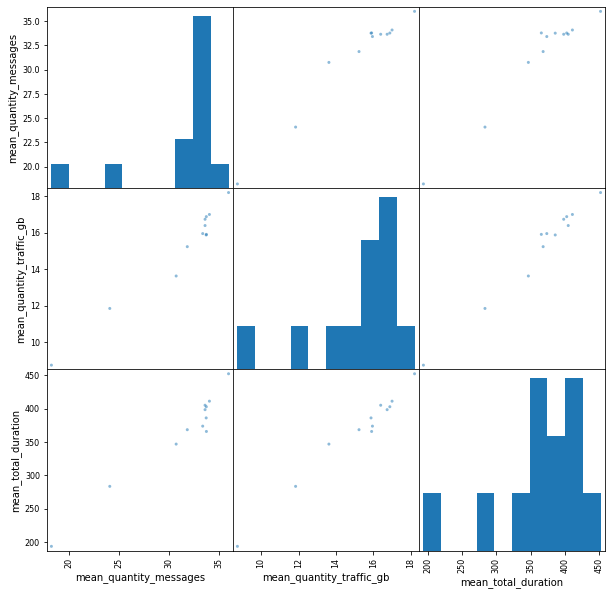

In [ ]:
print('тариф SMART')
print()
print('__________________________________________________________________________')
print(df_smart.loc[:, ['mean_quantity_messages', 'mean_quantity_traffic_gb', 'mean_total_duration']].describe())
print()
print('Среднее количество сообщений в месяц: {:.0f}'.format(df_smart['mean_quantity_messages'].mean()))
print()
print('Среднее объем трафика в месяц: {:.0f}'.format(df_smart['mean_quantity_traffic_gb'].mean()), 'Гб')
print()
print('Среднее количество минут разговора в месяц: {:.0f}'.format(df_smart['mean_total_duration'].mean()), 'мин.')
print('__________________________________________________________________________')
print(df_smart.loc[:, ['var_quantity_messages', 'var_quantity_traffic_gb', 'var_total_duration']].describe())
print('__________________________________________________________________________')
print(df_smart.loc[:, ['std_quantity_messages', 'std_quantity_traffic_gb', 'std_total_duration']].describe())
print()
pd.plotting.scatter_matrix(df_smart[
                                    ['mean_quantity_messages',
                                     'mean_quantity_traffic_gb',
                                     'mean_total_duration']
                                    ],
                           figsize = (10,10)
                           )

### Сравнение

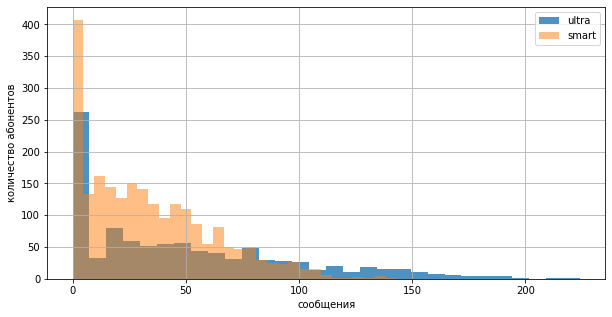

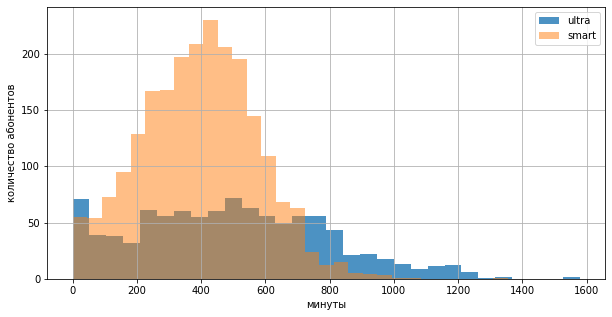

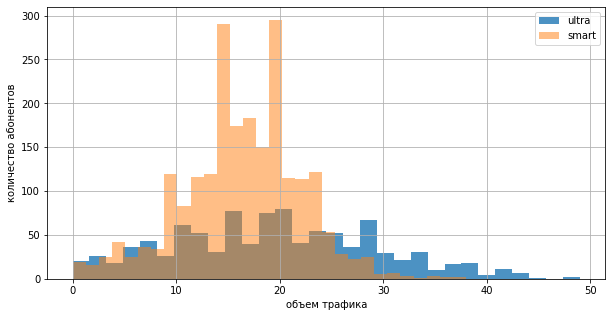

In [ ]:
df.query('tariff_name == "ultra"')['quantity_messages'].hist(bins=30,
                                                             alpha=0.8,
                                                             label='ultra',
                                                             figsize=(20,10))
df.query('tariff_name == "smart"')['quantity_messages'].hist(bins=30,
                                                             alpha=0.5,
                                                             label='smart',
                                                             figsize=(10,5))
plt.legend(loc='upper right')
plt.xlabel('сообщения')
plt.ylabel('количество абонентов')
plt.show()
print()
df.query('tariff_name == "ultra"')['total_duration'].hist(bins=30,
                                                             alpha=0.8,
                                                             label='ultra',
                                                             figsize=(20,10))
df.query('tariff_name == "smart"')['total_duration'].hist(bins=30,
                                                             alpha=0.5,
                                                             label='smart',
                                                             figsize=(10,5))
plt.legend(loc='upper right')
plt.xlabel('минуты')
plt.ylabel('количество абонентов')
plt.show()
print()
df.query('tariff_name == "ultra"')['quantity_traffic_gb'].hist(bins=30,
                                                             alpha=0.8,
                                                             label='ultra',
                                                             figsize=(20,10))
df.query('tariff_name == "smart"')['quantity_traffic_gb'].hist(bins=30,
                                                             alpha=0.5,
                                                             label='smart',
                                                             figsize=(10,5))
plt.legend(loc='upper right')
plt.xlabel('объем трафика')
plt.ylabel('количество абонентов')
plt.show()

я не вижу смысл так смотреть на тарифы и польхователей, так как количество людей разное

In [ ]:
t = len(df.query('tariff_name == "ultra"').groupby(level='full_name'))
r = len(df.query('tariff_name == "smart"').groupby(level='full_name'))
e = len(users)
print('абонентов всего', e)
print('абонентов ultra', t)
print('абонентов smart', r)

if t + r == e:
  print('успех')
elif t + r != e:
  print('не сходится, но')
  if t > r:
    print('больше абонентов ultra')
  elif t < r:
    print('больше абонентов smart')

print('2х я дропнул')
print('--------------------------------')

# s = len(df.groupby(level='full_name'))
# m = len(male.groupby(level='full_name'))
# f = len(female.groupby(level='full_name'))
# print('В df всего женщин и мужчин', s)
# print('мужчин', m)
# print('женщин', f)
# print('--------------------------------')

s = len(users)
m = len(users.query('gender == "male"'))
f = len(users.query('gender == "female"'))
print('В users всего женщин и мужчин', s)
print('мужчин', m)
print('женщин', f)
print('--------------------------------')
print('получилось', r + t)
print('а должно быть', e)
print('проблема дропнута')

абонентов всего 500
абонентов ultra 148
абонентов smart 350
не сходится, но
больше абонентов smart
2х я дропнул
--------------------------------
В users всего женщин и мужчин 500
мужчин 244
женщин 256
--------------------------------
получилось 498
а должно быть 500
проблема дропнута


### Сравним исопльзование тарифов по другому

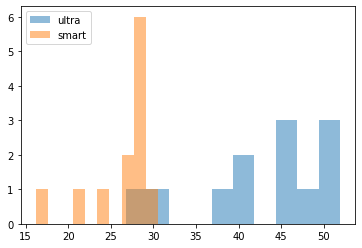

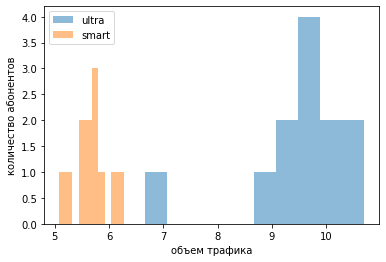

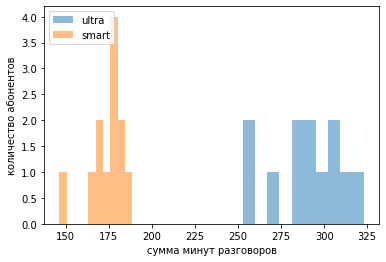

In [ ]:
plt.hist(
    df_ultra['std_quantity_messages'],
    alpha = 0.5,
    label='ultra',
    )
plt.hist(
    df_smart['std_quantity_messages'],
    alpha = 0.5,
    label='smart'
    )
plt.legend(loc='upper left')
plt.show()
print()

plt.hist(
    df_ultra['std_quantity_traffic_gb'],
    alpha = 0.5,
    label='ultra'
    )

plt.hist(
    df_smart['std_quantity_traffic_gb'],
    alpha = 0.5,
    label='smart'
    )
plt.legend(loc='upper left')
plt.xlabel('объем трафика')
plt.ylabel('количество абонентов')
plt.show()
print()
plt.hist(
    df_ultra['std_total_duration'],
    alpha = 0.5,
    label='ultra'
    )

plt.hist(
    df_smart['std_total_duration'],
    alpha = 0.5,
    label='smart'
    )
plt.legend(loc='upper left')
plt.xlabel('сумма минут разговоров')
plt.ylabel('количество абонентов')
plt.show()

А вот тут мы болле наглядно видим, что дураков нет. Люди по разному используют тарифы)

# Шаг 4. Проверьте гипотезы

- как вы формулировали нулевую и альтернативную гипотезы;
- какой критерий использовали для проверки гипотез и почему.

### средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются

H0 - средняя выручка пользователей тарифов «Ультра» и «Смарт» не различаются

H1 - средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются

In [ ]:
ultra = df.query('tariff_name == "ultra"')
smart = df.query('tariff_name == "smart"')

a = ultra['need_to_pay'].mean()

b = smart['need_to_pay'].mean()

print('Средняя выручка ultra в месяц', round(a), 'рублей')
print('Средняя выручка smart в месяц', round(b), 'рублей')
print('_____________________________________')
print()

alpha = 0.05
results = st.ttest_ind(df_ultra['mean_need_to_pay'], df_smart['mean_need_to_pay'])
print('P-value:', results.pvalue)

if (results.pvalue > alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не отвергаем нулевую гипотезу")

Средняя выручка ultra в месяц 2070 рублей
Средняя выручка smart в месяц 1258 рублей
_____________________________________

P-value: 6.8601924277839045e-12
Не отвергаем нулевую гипотезу


<div class="alert alert-info">
<b>вывод:</b>
<br>выручка на тарифах различна
</div>

Считаю, что траты на обслуживание абонентов с разными тарифами - различаются. 

У нас нет нужных метрик (зарплата сотрудников, обслуживание техники и тд)

Плюс у нас разное количество людей в каждом из тарифов

могу посмотреть суммарную выручку по каждому тарифу

H0: Переплата сверх тарифов равна

H1: Переплата сверх тарифов различается

In [ ]:
print('Cуммарная выручка ultra', sum(ultra['need_to_pay']), 'рублей')
print('Суммарная выручка smart', sum(smart['need_to_pay']), 'рублей')
print('_____________________________________')
print()
print('Cуммарная переплата ultra', sum(ultra['overpayment']), 'рублей')
print('Суммарная переплата smart', sum(smart['overpayment']), 'рублей')
print('_____________________________________')
print()

alpha = 0.05
results = st.ttest_ind(ultra['overpayment'], smart['overpayment'], equal_var = False)
print('P-value:', results.pvalue)

if (results.pvalue != alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не отвергаем нулевую гипотезу")

Cуммарная выручка ultra 2039100 рублей
Суммарная выручка smart 2803165 рублей
_____________________________________

Cуммарная переплата ultra 118350 рублей
Суммарная переплата smart 1577215 рублей
_____________________________________

P-value: 2.9413519240194293e-157
Отвергаем нулевую гипотезу


забавно

средняя месячная выручка с тарифа ultra больше чем у smart

но

суммарная выручка у smart практически на 800 тр больше чем у ultra
переплата у тарифа smart 1577215 рублей. это гораздо больше чем у тарифа ultra

выод

более дешевый тариф приносит больше денег компании. Либо маркетологи молодцы, либо люди не заморачиваются с лимитами. 

тест проводился с параметром equal_var = False, так выборки не равны по размеру и стандартное отклонение различается

### средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов

H0 - средняя выручка пользователей из Москвы равна средней выручке пользователей из других регионов

H1 - они различаются

In [ ]:
moscow = df.query('city == "Москва"')
other = df.query('city != "Москва"')

print('средняя выручка пользователей из Москвы', round(moscow['need_to_pay'].mean()), 'рублей')
print('средняя выручка пользователей из других регионов', round(other['need_to_pay'].mean()), 'рублей')
print('_____________________________________')
print()

alpha = .05
results = st.ttest_ind(moscow['need_to_pay'], other['need_to_pay'], equal_var = False)
print('P-value:', results.pvalue)

if (results.pvalue > alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не отвергаем нулевую гипотезу")

средняя выручка пользователей из Москвы 1527 рублей
средняя выручка пользователей из других регионов 1502 рублей
_____________________________________

P-value: 0.46532858228722906
Отвергаем нулевую гипотезу


Средняя выручка пользователей из Москвы отличается от выручки из других регионов

### минутка сексизма

In [ ]:
df['call_length'] = df['total_duration'] / df['quantity_calls'] # средняя продолжительность звонка в месяц
male = df.query('gender == "male"')
female = df.query('gender == "female"')

### Минуты

H0: Женщины и мужчины используют одинаковое количество минут

H1: Женщины и мужчины используют разное количество минут

In [ ]:
print('Мужчины проговорили', round(sum(male['total_duration'] / 60)), 'часов')
print('Женщины проговорили', round(sum(female['total_duration'] / 60)), 'часов')
print('_____________________________________')

alpha = 0.05
results = st.ttest_ind(male['total_duration'], female['total_duration'], equal_var = False)
print('P-value:', results.pvalue)

if (results.pvalue > alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не отвергаем нулевую гипотезу")

Мужчины проговорили 10654 часов
Женщины проговорили 12185 часов
_____________________________________
P-value: 0.7078158720222949
Отвергаем нулевую гипотезу


Женщины и мужчины используют разное количество минут

### Количество звонков

H0: Женщины и мужчины делают одинаковое количество звонков

H1: Женщины и мужчины делают разное количество звонков

In [ ]:
male = df.query('gender == "male"')
female = df.query('gender == "female"')

print('Мужчины совершили', round(sum(male['quantity_calls'])), 'звонков')
print('Женщины проговорили', round(sum(female['quantity_calls'])), 'звонков')
print('_____________________________________')

alpha = 0.05
results = st.ttest_ind(male['quantity_calls'], female['quantity_calls'], equal_var = False)
print('P-value:', results.pvalue)

if (results.pvalue > alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не отвергаем нулевую гипотезу")

Мужчины совершили 94685 звонков
Женщины проговорили 107922 звонков
_____________________________________
P-value: 0.842749408882498
Отвергаем нулевую гипотезу


Женщины и мужчины делают разное количество звонков

### Продолжительность разговора

H0: Продолжительность разговора у женщин и мужчин равно

H1: Продолжительность разговора у женщин и мужчин различается

В среднем разговор мужчины длится 7 минут
В среднем разговор женщины длится 7 минут
_____________________________________
P-value: nan
Не отвергаем нулевую гипотезу
_____________________________________
Мужчины
count    1475.000000
mean        6.729877
std         0.999217
min         0.000000
25%         6.222222
50%         6.764706
75%         7.260870
max        13.666667
Name: call_length, dtype: float64


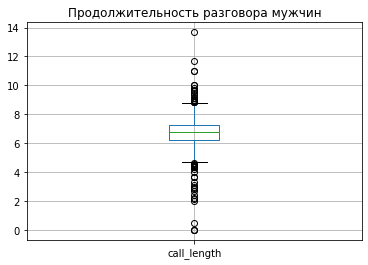

_____________________________________

Женщины
count    1699.000000
mean        6.782971
std         1.032563
min         0.000000
25%         6.247951
50%         6.773810
75%         7.282692
max        18.000000
Name: call_length, dtype: float64


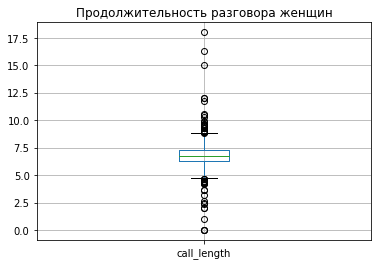

In [ ]:
print('В среднем разговор мужчины длится', round(male['call_length'].mean()), 'минут')
print('В среднем разговор женщины длится', round(female['call_length'].mean()), 'минут')
print('_____________________________________')

alpha = 0.05
results = st.ttest_ind(male['call_length'], female['call_length'], equal_var = False)
print('P-value:', results.pvalue)

if (results.pvalue > alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не отвергаем нулевую гипотезу")

print('_____________________________________')

print('Мужчины')
male.boxplot('call_length')
print(male['call_length'].describe())
plt.title('Продолжительность разговора мужчин')
plt.show()
print('_____________________________________')
print()
print('Женщины')
female.boxplot('call_length')
print(female['call_length'].describe())
plt.title('Продолжительность разговора женщин')
plt.show()

Продолжительность разговора у женщин и мужчин равно

### ГИГИ

H0: Женщины и мужчины используют одинаковое количество трафика
H1: Женщины и мужчины используют разное количество трафика

In [ ]:
print('Мужчины использовали', round(sum(male['quantity_traffic_gb'])), 'Гб')
print('Женщины использовали', round(sum(female['quantity_traffic_gb'])), 'Гб')
print('_____________________________________')


alpha = 0.05
results = st.ttest_ind(male['quantity_traffic_gb'], female['quantity_traffic_gb'], equal_var = False)
print('p-значение:', results.pvalue)
if (results.pvalue > alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не отвергаем нулевую гипотезу")

Мужчины использовали 25804 Гб
Женщины использовали 29795 Гб
_____________________________________
p-значение: 0.2710873135338433
Отвергаем нулевую гипотезу


Женщины и мужчины используют разное количество трафика

### Сообщения

H0: Женщины и мужчины используют одинаковое количество сообщений

H1: Женщины и мужчины используют разное количество сообщений

In [ ]:
print('Мужчины написали', round(sum(male['quantity_messages'])), 'сообщений')
print('Женщины написали', round(sum(female['quantity_messages'])), 'сообщений')
print('_____________________________________')


alpha = 0.05
results = st.ttest_ind(male['quantity_traffic_gb'], female['quantity_traffic_gb'], equal_var = False)
print('p-значение:', results.pvalue)
if (results.pvalue > alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не отвергаем нулевую гипотезу")

Мужчины написали 58226 сообщений
Женщины написали 64810 сообщений
_____________________________________
p-значение: 0.2710873135338433
Отвергаем нулевую гипотезу


Женщины и мужчины используют разное количество сообщений

### Заплатили всего

H0: Траты женщины и мужчины равны

H1: Траты женщины и мужчины различаются

In [ ]:
print('Мужчины заплатили всего', round(sum(male['need_to_pay'])), 'рублей')
print('Женщины заплатили всего', round(sum(female['need_to_pay'])), 'рублей')
print('_____________________________________')


alpha = 0.01
results = st.ttest_ind(male['need_to_pay'], female['need_to_pay'], equal_var = False)
print('p-значение:', results.pvalue)
if (results.pvalue > alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не отвергаем нулевую гипотезу")

Мужчины заплатили всего 2242585 рублей
Женщины заплатили всего 2599680 рублей
_____________________________________
p-значение: 0.26803706156561313
Отвергаем нулевую гипотезу


Траты женщины и мужчины различаются

### Переплата

H0: Переплата за мобильную связь женщин и мужчин равна

H1: Переплата за мобильную связь женщин и мужчин различается

In [ ]:
print('Мужчины переплатили', round(sum(male['overpayment'])), 'рублей')
print('Женщины переплатили', round(sum(female['overpayment'])), 'рублей')
print('_____________________________________')
print()

alpha = 0.05
results = st.ttest_ind(male['overpayment'], female['overpayment'], equal_var = False)
print('p-значение:', results.pvalue)
if (results.pvalue > alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не отвергаем нулевую гипотезу")

Мужчины переплатили 836635 рублей
Женщины переплатили 858930 рублей
_____________________________________

p-значение: 0.04449106161924755
Не отвергаем нулевую гипотезу


Переплата за мобильную связь женщин и мужчин  не различается

# Шаг 5. Общий вывод

Данные были предоставлены в хорошем состоянии. Выбросов и не обнаружил.
Были найлены два абонента, которые не пользовались услугами оператора и ущли от оператора очень быстро.
Мной было принято решение не использовать данные этих людей для аналитического анализа, так как мы не знаем заплатили они за подключение к тарифу или нет.

Для каждого ползователя была расчитана плата за каждый месяц (2018года) пользования тарифами смарт и ультра и посчитана переплата. 

В ходе проверки гипотез выяснилось, что:

- средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются
- переплата сверх тарифов различается
- средняя выручка пользователей из Москвы не отличается от выручки из других регионов
- женщины и мужчины используют разное количество минут
- женщины и мужчины делают разное количество звонков
- продолжительность разговора у женщин и мужчин равна
- женщины и мужчины используют разное количество трафика
- женщины и мужчины используют разное количество сообщений
- траты женщины и мужчины различаются
- переплата за мобильную связь женщин и мужчин различается

Если взять за внимание, что обслуживание абонентов с более дешевым тарифом обходится в меньшую сумму оператору связи, то с большой уверенностью можно сказать, что тариф smart приносит больше выгоды компании. За счет маленьких лимитов и более дешевой абонентской платы люди активнее покупают этот тариф, затем вылезают за рамки ограничений и доплачивают за превышение ограничений